## Problem Statement

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

In [3]:
import pandas as pd

In [11]:
data = pd.read_csv('creditcard.csv')

In [12]:
pd.options.display.max_columns = None

### 1. Display Top 5 Rows of The Dataset

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. Check Last 5 Rows of The Dataset

In [14]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [15]:
data.shape

(284807, 31)

In [16]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 5. Check Null Values In The Dataset

In [18]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [22]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [23]:
data = data.drop(['Time'],axis=1)

In [24]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [25]:
data.shape

(284807, 30)

In [26]:
data.duplicated().any()

True

In [27]:
data = data.drop_duplicates()

In [28]:
data.shape

(275663, 30)

In [29]:
284807- 275663

9144

### 6. Not Handling Imbalanced

In [30]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [31]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

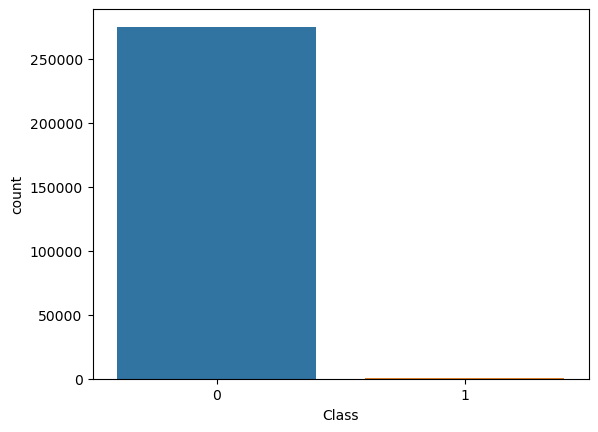

In [32]:
sns.countplot(data,x='Class')

### 7. Store Feature Matrix In X And Response (Target) In Vector y

In [33]:
X = data.drop('Class',axis=1)
y = data['Class']

### 8. Splitting The Dataset Into The Training Set And Test Set

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

### 9. Handling Imbalanced Dataset

In [35]:
# Undersampling
# Oversampling

### Undersampling

In [36]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [37]:
normal.shape

(275190, 30)

In [38]:
fraud.shape

(473, 30)

In [39]:
normal_sample=normal.sample(n=473)

In [40]:
normal_sample.shape

(473, 30)

In [41]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [42]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [43]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.433458,1.538886,-1.777745,-0.716860,1.265761,-1.120468,1.170481,0.156008,-0.967311,-0.679800,1.073052,0.456078,-0.202297,-0.188602,-0.824068,0.294986,0.482892,0.507099,-0.233768,-0.129427,0.248969,0.677346,-0.022753,0.653812,-0.875772,0.349801,0.177142,0.247911,-0.293338,0
1,1.501698,-1.422153,-0.822229,-2.471912,0.672892,3.458087,-1.782157,0.843311,-1.748043,1.474684,-0.279584,-1.050250,0.603740,-0.356882,1.016213,0.166073,-0.124664,0.751447,-0.078573,-0.135399,-0.088733,-0.050169,-0.068585,1.000368,0.505445,-0.081031,0.048552,0.024970,-0.193306,0
2,0.159801,1.247350,-0.529624,0.992291,0.736143,0.734900,-0.841834,-2.547394,-0.510239,-1.198670,-1.228448,-0.785556,-0.892609,-0.441380,1.671666,0.572608,0.833427,0.724677,-0.009448,0.611081,-1.352785,0.188313,-0.217087,-1.463792,0.794387,-0.118624,0.156288,0.279294,-0.349231,0
3,-0.196724,0.817926,-1.489204,0.353722,1.196364,1.406003,0.950045,0.555439,-1.382925,-0.198632,1.266061,0.713432,0.159757,1.486477,1.671697,-2.216713,1.312380,-0.743167,2.068291,0.271873,0.510658,1.417735,0.148437,-0.647220,-0.647893,0.629092,0.089064,0.139126,0.136176,0
4,-0.424964,0.961523,1.438321,-0.223650,0.100494,-0.394240,0.557333,0.131968,-0.552057,-0.126002,0.911629,0.248106,-0.524148,0.423434,0.229488,0.516447,-0.734703,0.315417,0.432811,0.078959,-0.205928,-0.586238,-0.075058,-0.035768,-0.198715,0.076245,0.258508,0.106032,-0.349671,0


In [44]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

### 10. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred1 = log.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred1)

0.9210526315789473

In [50]:
accuracy_score(y_test,y_pred1)

0.9210526315789473

In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [52]:
precision_score(y_test,y_pred1)

0.9306930693069307

In [53]:
precision_score(y_test,y_pred1)

0.9306930693069307

In [54]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [55]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [56]:
f1_score(y_test,y_pred1)

0.9261083743842364

In [57]:
f1_score(y_test,y_pred1)

0.9261083743842364

### 11. Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred2 = dt.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred2)

0.8736842105263158

In [61]:
precision_score(y_test,y_pred2)

0.8679245283018868

In [62]:
recall_score(y_test,y_pred2)

0.9019607843137255

In [63]:
f1_score(y_test,y_pred2)

0.8846153846153846

### 12. Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred3 = rf.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [67]:
precision_score(y_test,y_pred3)

0.9494949494949495

In [68]:
recall_score(y_test,y_pred3)

0.9215686274509803

In [69]:
f1_score(y_test,y_pred3)

0.9353233830845771

In [70]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [71]:
final_data

,Models,ACC
0,LR,92.105263
1,DT,87.368421
2,RF,93.157895


<Axes: xlabel='Models', ylabel='ACC'>

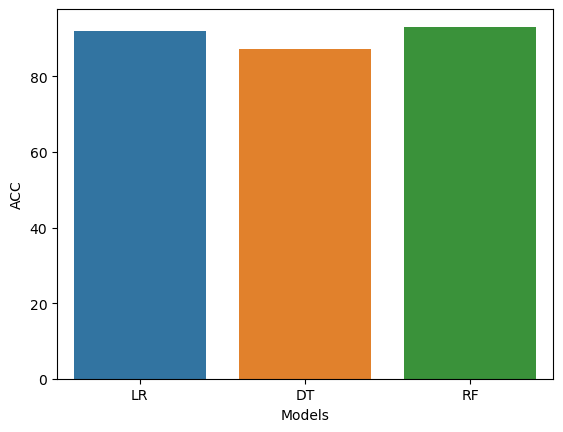

In [72]:
sns.barplot(final_data,x='Models',y='ACC')

### Oversampling

In [73]:
X = data.drop('Class',axis=1)
y = data['Class']

In [74]:
X.shape

(275663, 29)

In [75]:
y.shape

(275663,)

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [78]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

### 10. Logistic Regression

In [80]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred1 = log.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred1)

0.9443475416984629

In [83]:
precision_score(y_test,y_pred1)

0.9729452518723511

In [84]:
recall_score(y_test,y_pred1)

0.9140410523062379

In [85]:
f1_score(y_test,y_pred1)

0.9425737747947055

### 11. Decision Tree Classifier

In [86]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred2 = dt.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred2)

0.9980377193938733

In [89]:
precision_score(y_test,y_pred2)

0.9972950894072796

In [90]:
recall_score(y_test,y_pred2)

0.998781884624475

In [91]:
f1_score(y_test,y_pred2)

0.9980379332897319

### 12. Random Forest Classifier

In [92]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred3 = rf.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [95]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [96]:
recall_score(y_test,y_pred3)

1.0

In [97]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [98]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [99]:
final_data

,Models,ACC
0,LR,94.434754
1,DT,99.803772
2,RF,99.991824


<Axes: xlabel='Models', ylabel='ACC'>

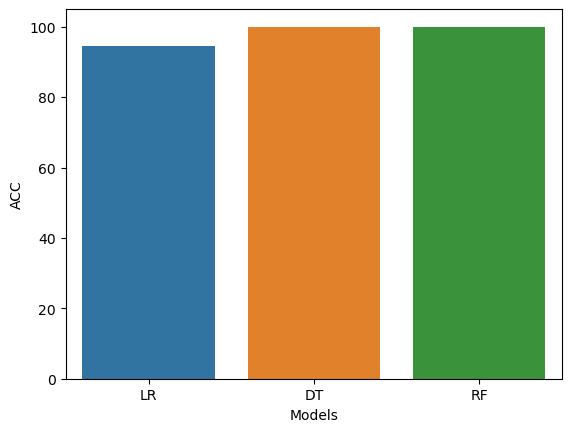

In [100]:
sns.barplot(final_data,x='Models',y='ACC')

# Save The Model

In [101]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [102]:
import pickle

In [103]:
pickle.dump(rf1,open('Prediction_of_Credit_Card_fraud_model.pkl','wb'))

In [97]:
import joblib

In [98]:
joblib.dump(rf1,"Prediction_of_Credit_Card_fraud_model")

['Prediction_of_Credit_Card_fraud_model']

In [99]:
model = joblib.load("Prediction_of_Credit_Card_fraud_model")

In [100]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/Users/prashantkapse01/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [101]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
